# A visual tour of algorithms' convergence

*(Jupyter notebook by Simone Brugiapaglia)*

Convergence is one of the most important concepts in numerical analysis. It allows us to understand whether a given numerical algorithm is able to accurately approximate a certain quantity of interest, and at what speed. This notebook illustrates the notion of algorihtms' convergence through the use of visualization. 

For an overivew of visualization method in Python, see Chapter 12 of the book

*Q. Kong, T. Siauw, and A. M. Bayen. Python Programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press, 2021. (https://pythonnumericalmethods.berkeley.edu/)*

For algorithms' convergence, see Section 1.3 of 

*Richard L. Burden, J. Douglas Faires and Annette M. Burden. Numerical Analysis (10th Edition). Cengage, 2016.*

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Order of convergence

Recall that a sequence $(\alpha_n)_{n=0}^\infty$ is said to converge to $\alpha$ with order of convergence $O(\beta_n)$ if 
$$
\lim_{n\to \infty} \alpha_n = \alpha,  \quad \lim_{n\to \infty} \beta_n = 0
$$
and if there exists a constant $K>0$ such that
$$
|\alpha_n - \alpha| \leq K \beta_n, \quad \text{for $n$ large enough.}
$$
A typical scenario is that of *algebraic* order of convergence, i.e., of the form $O(1/n^p)$ for some $p > 0$.

## Algebraic convergence
Consider the sequence
$$
\alpha_n = 1 + \frac2n + \frac{10 \cos(n)}{n^2}, \quad n \geq 1,
$$
converging to $\alpha = 1$.

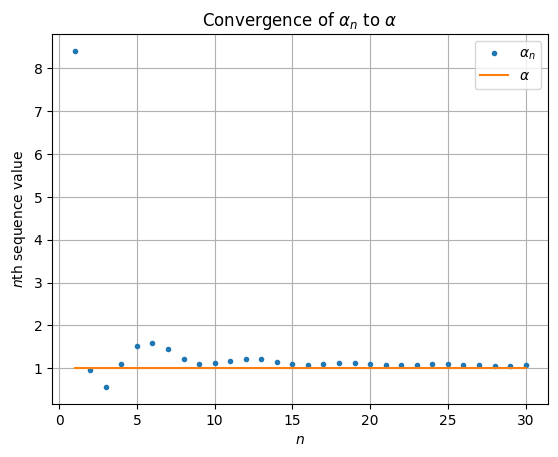

In [2]:
n = 1 + np.arange(30)      # n values
alpha_n = 1 + 2/n + 10 * np.cos(n)/n**2 # alpha_n values
alpha = np.ones(n.shape)   # alpha values

# Visualize convergence of alpha_n to alpha
plt.plot(n, alpha_n, '.', label = "$α_n$")
plt.plot(n, alpha, '-', label = "$α$")
plt.xlabel('$n$')
plt.ylabel('$n$th sequence value')
plt.legend()
plt.grid()
plt.title('Convergence of $α_n$ to $α$')

plt.show()

Since $10|\cos(n)|/n^2 \leq 1/n$ for every $n \geq 10$ (check this!), we have
$$
|\alpha_n - \alpha| \leq \frac{3}{n}, \quad \text{for all } n \geq 10.
$$
(Chekc this as well!) Hence, $\alpha_n$ converges to $1$ with order of convergence $O(1/n)$ (just choose $K = 3$ and $\beta_n = 1/n$ and here "large enough" means $n \geq 10$). 

Let's see what this means in terms of visualization.

Text(0.5, 1.0, 'Order of convergence')

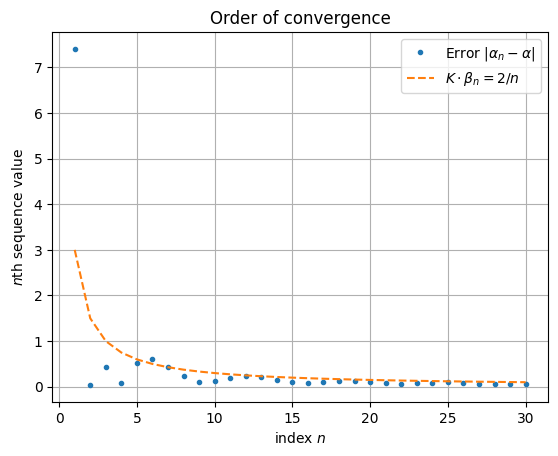

In [3]:
beta_n = 1/n
K = 3

# Visualize convergence of alpha_n to alpha
plt.plot(n, np.abs(alpha_n -  alpha), '.', label = "Error $|α_n - α|$")
plt.plot(n, K * beta_n, '--', label = "$K \cdot β_n = 2/n$")
plt.xlabel('index $n$')
plt.ylabel('$n$th sequence value')
plt.legend()
plt.grid()
plt.title('Order of convergence')

As expected, the sequence $K \cdot \beta_n$ is larger than the error $|\alpha_n - \alpha|$ for all $n \geq 10$. We could plot more than 30 values of $n$, but with this type of visualization strategy, we would not get any additional insight since the blue dots would practically coincide with the orange dashed line. By using a *log-log plot*, the situation becomes clearer. 


### Using log-log plots to see the order of convergence

A log-log plot is produced by plotting $x$- and $y$-coordinates in $\log_{10}$ scale. In the `matplotlib` module, this is implemented by the `plt.loglog()` function. It is also possible to consider a $\log_{10}$ transformation of the $x$-values or of the $y$-values only, using the command `plt.semilogx()` or `plt.semilogy()`. 

Below we visualize the absolute error and the sequences $K \cdot \beta_n$ and $\beta_n = 1/n$ using a log-log plot for the first 500 values of $n$.

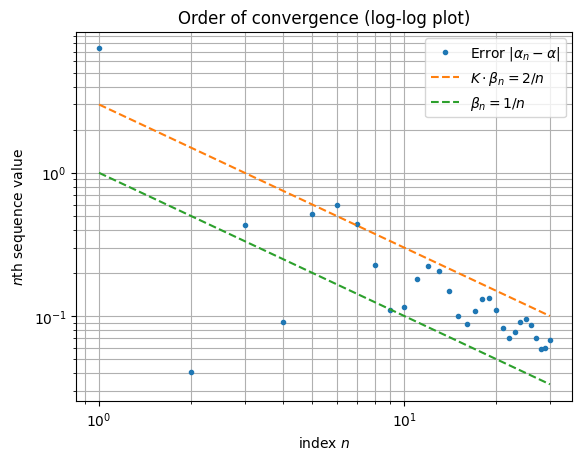

In [4]:
n_larger = np.arange(500) + 1 # n values
alpha_n_larger = 1 + 2/n + 10 * np.cos(n)/n**2 # alpha_n values
alpha_larger = np.ones(n.shape) # alpha values
beta_n_larger = 1/n

plt.loglog(n, np.abs(alpha_n_larger -  alpha_larger), '.', label = "Error $|α_n - α|$")
plt.loglog(n, K * beta_n_larger, '--', label = "$K \cdot β_n = 2/n$")
plt.loglog(n, beta_n_larger, '--', label = "$β_n =1/n$")
plt.xlabel('index $n$')
plt.ylabel('$n$th sequence value')
plt.legend()
plt.grid(which = 'both')
plt.title('Order of convergence (log-log plot)')

plt.show()

As in the standard plot, we see that $|\alpha_n - \alpha| \leq K \cdot \beta_n$ for all $n \geq 10$. Moreover, the error $|\alpha_n - \alpha|$ and the sequences $K \cdot \beta_n = 3/n$ and $\beta_n = 1/n$ remarkably become parallel for large values of $n$ in the log-log plot. 

### Numerical discovery of the order of convergence

This can be explained by the fact that algebraic functions of the form 
$$
y = C \cdot x^{p},
$$
for some $C > 0$, after a $\log_{10}$ transformation of the $x$ and $y$ values, i.e. $X = \log_{10}(x)$ and $Y = \log_{10}(y)$, become linear:
$$
Y = \log_{10}(y) = \log_{10}(C \cdot x^{p}) = \log_{10}(C) +  p \log_{10}(x) = C' + p X.
$$
Note that the algebraic power $p$ in the $(x,y)$ plot becomes a *slope* in the transformed $(X,Y)$ plane. In particular, changing the value of the multiplicative constant $C$ does not change the slope in the log-log plot. 

So, numerically, one could try to guess the order of convergence of a sequence by checking parallelism with different power laws in the log-log plot.

ValueError: x and y must have same first dimension, but have shapes (500,) and (30,)

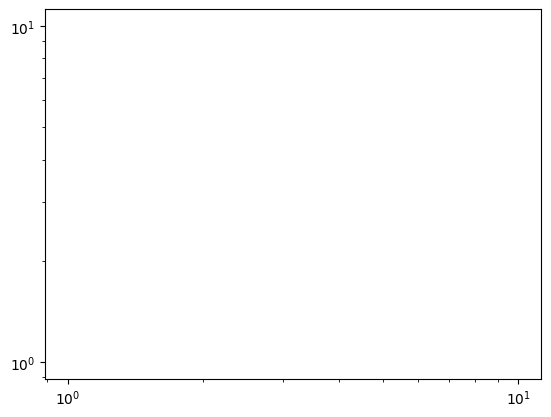

In [5]:
plt.loglog(n_larger, np.abs(alpha_n_larger -  alpha_larger), '.', label = "Error $|α_n - α|$")
plt.loglog(n_larger, 1/np.sqrt(n_larger), '--', label = "$n^{-0.5}$")
plt.loglog(n_larger, 1/n_larger, '--', label = "$n^{-1}$")
plt.loglog(n_larger, 1/n_larger**2, '--', label = "$n^{-2}$")
plt.loglog(n_larger, 1/n_larger**(math.e), '--', label = "$n^{-e}$")
plt.xlabel('index $n$')
plt.ylabel('$n$th sequence value')
plt.legend()
plt.grid(which = 'both')
plt.title('Guessing the order of convergence (log-log plot)')

plt.show()

As we can see, the error sequence is only parallel to the sequence $1/n$ and not to the other ones.

## Recommended problems

Run the experiments similar to those in this notebook for the following sequences:

- $\displaystyle \alpha_n = \frac{5 n^3 + 3 n + \sin(n)}{7 n^3 - 2n }$

- $\alpha_n =  2^{-n} (n^3 + 3n)$

Note that in the second example the order of convergence is faster than algebraic. What happens using `plt.loglog()`, `plt.semilogx()` or `plt.semilogy()`? (Note that in Python you can produce the sequence $2^n$ using the command `2.0**n`).

Consider also other sequences suggested in the Problems of Section 1.3 of *Richard L. Burden, J. Douglas Faires and Annette M. Burden. Numerical Analysis (10th Edition). Cengage, 2016.*